In [ ]:
from keras.datasets import cifar10

2. import libraries

In [66]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

3. Split the dataset into x_train,y_train,x_test,y_test.

In [67]:


#load cifer10 dataset and split it.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


4. Change train data and test data into float32 and divide by 255.

In [68]:
#change train data and test data into float32 and divide by 255
#That normalizes data from 1 to 0. 
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

5. Convert y_train and y_test into 10 categories

In [69]:


#convert y_train and y_test into 10 categories
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test,10)

6. Let's show images of Cifer-10 images.

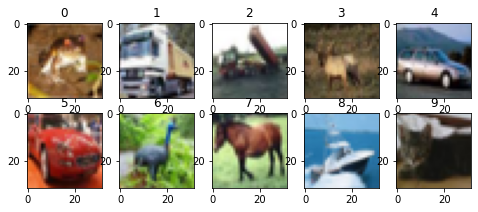

In [70]:
# 6. Let's show images of Cifer-10 images.
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(32,32,3))

7. Let's build 1st CNN model with Adam optimizer.

In [71]:


#build 1st model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                      

8. Let's fit 1st CNN model with Adam optimizer.

In [72]:
#model fitting
result1=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 10s 8ms/step - loss: 1.4174 - accuracy: 0.4957
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0123 - accuracy: 0.6448
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 0.8276 - accuracy: 0.7116
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.6942 - accuracy: 0.7586
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.5532 - accuracy: 0.8092
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.4068 - accuracy: 0.8620
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.2735 - accuracy: 0.9092
Epoch 8/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1595 - accuracy: 0.9503
Epoch 9/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0982 - accuracy: 0.9707
Epoch 10/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0589 - accuracy: 0.984

9. Let's build 2nd CNN model with RMSprop optimizer.

In [73]:
#Build 2nd model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1048704   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

10. Let's fit 2nd CNN model with RMSprop optimizer.

In [74]:
#model fitting
result2=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 5s 8ms/step - loss: 1.5846 - accuracy: 0.4351
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1493 - accuracy: 0.5977
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9741 - accuracy: 0.6600
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.8514 - accuracy: 0.7041
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7441 - accuracy: 0.7412
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6426 - accuracy: 0.7748
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5356 - accuracy: 0.8144
Epoch 8/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4322 - accuracy: 0.8518
Epoch 9/20
391/391 [==============================] - 3s 7ms/step - loss: 0.3347 - accuracy: 0.8860
Epoch 10/20
391/391 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.9192

11. Evaluate the two models by using two metrics, loss and accuracy.

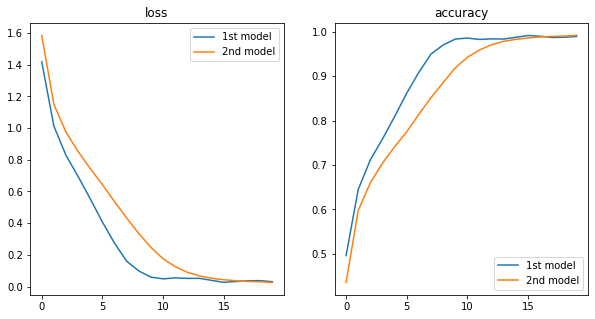

In [75]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_result1 = result1.history[metric] 
    plt_result2 = result2.history[metric]

    #plot them all
    plt.plot(plt_result1, label='1st model') 
    plt.plot(plt_result2, label='2nd model') 
    plt.legend() 
plt.show()

12. How to predict a single photo data?

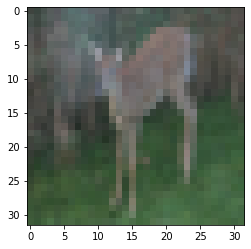

In [85]:
plt.imshow(x_test[[94]].reshape(32,32,3))

In [87]:
#Let's predict.
prediction=model.predict(x_test[[94]]) 
prediction

1/1 [==============================] - 0s 75ms/step


array([[5.4495813e-10, 1.7429439e-14, 5.3817666e-07, 8.2064522e-10,
        9.9994147e-01, 1.0437689e-05, 7.2080681e-08, 4.7344241e-05,
        3.6828391e-13, 2.0887301e-14]], dtype=float32)

In [88]:
names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#Preparation for this predction. 
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in names]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],"!")

The answer is deer !


13. Let's predict whole test data!

In [89]:
#Let's predict whole test data! 
predictions = model.predict(x_test)
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")
results.tail()

313/313 [==============================] - 1s 2ms/step


9995    8
9996    6
9997    5
9998    1
9999    7
Name: Label, dtype: int64